<a href="https://colab.research.google.com/github/Robertsingh04/DS_Project_Industrial-Human-Resource-Geo-Visualization/blob/main/Industrial_Human_Resource_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_2 = pd.read_csv('/content/newdf.csv')

# Display the first 5 rows of the DataFrame
df_2.head()


,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,...,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude
0,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,...,43249,15791,NCT,North,889989,5.859521,889989,1,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,...,137,64,NCT,North,1708,5.967136,1708,1,14.750429,78.570026
2,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,...,53,25,NCT,North,261,8.388889,261,1,27.100399,93.616601
3,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,...,21,8,NCT,North,120,40.500000,120,1,26.749981,94.216667
4,Growing of rice,9,9,0,0,0,0,9,9,0,...,0,0,NCT,North,9,9.000000,9,1,25.785414,87.479973


In [3]:
df_2.columns.tolist()

['NICName',
 'MainWorkersTotalPersons',
 'MainWorkersTotalMales',
 'MainWorkersTotalFemales',
 'MainWorkersRuralPersons',
 'MainWorkersRuralMales',
 'MainWorkersRuralFemales',
 'MainWorkersUrbanPersons',
 'MainWorkersUrbanMales',
 'MainWorkersUrbanFemales',
 'MarginalWorkersTotalPersons',
 'MarginalWorkersTotalMales',
 'MarginalWorkersTotalFemales',
 'MarginalWorkersRuralPersons',
 'MarginalWorkersRuralMales',
 'MarginalWorkersRuralFemales',
 'MarginalWorkersUrbanPersons',
 'MarginalWorkersUrbanMales',
 'MarginalWorkersUrbanFemales',
 'State',
 'District',
 'TotalWorkers',
 'MaleFemaleRatio',
 'TotalPopulation',
 'WorkersRatio',
 'latitude',
 'longitude']

In [4]:
df_2['NICName'].unique()

array(['Total',
       'Crop and animal production, hunting and related service activities',
       'Growing of non-perennial crops',
       'Growing of cereals (except rice), leguminous crops and oil seeds',
       'Growing of rice',
       'Growing of vegetables and melons, roots and tubers',
       'Growing of fibre crops', 'Growing of other non-perennial crop',
       'Growing of perennial crops', 'Growing of beverage crops',
       'Growing of spices, aromatic, drug and pharmaceutical crops',
       'Growing of other perennial crops', 'Plant propagation',
       'Animal production', 'Raising of cattle and buffaloes',
       'Raising of horses and other equines',
       'Raising of sheep and goats', 'Raising of swine/pigs',
       'Raising of poultry', 'Raising of other animals', 'Mixed farming',
       'Support activities to agriculture and post-harvest crop activities',
       'Support activities for crop production',
       'Support activities for animal production',
       'Pos

In [6]:
df_2.dtypes

NICName                         object
MainWorkersTotalPersons          int64
MainWorkersTotalMales            int64
MainWorkersTotalFemales          int64
MainWorkersRuralPersons          int64
MainWorkersRuralMales            int64
MainWorkersRuralFemales          int64
MainWorkersUrbanPersons          int64
MainWorkersUrbanMales            int64
MainWorkersUrbanFemales          int64
MarginalWorkersTotalPersons      int64
MarginalWorkersTotalMales        int64
MarginalWorkersTotalFemales      int64
MarginalWorkersRuralPersons      int64
MarginalWorkersRuralMales        int64
MarginalWorkersRuralFemales      int64
MarginalWorkersUrbanPersons      int64
MarginalWorkersUrbanMales        int64
MarginalWorkersUrbanFemales      int64
State                           object
District                        object
TotalWorkers                     int64
MaleFemaleRatio                float64
TotalPopulation                  int64
WorkersRatio                     int64
latitude                 

In [7]:
!pip install gensim
!pip install nltk

In [8]:
!pip install scipy==1.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [9]:
df_2['NICName'] = df_2['NICName'].astype(str)

def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply the function to your textual data
df_2['NICName'] = df_2['NICName'].apply(clean_and_tokenize)

In [10]:
pip install -U gensim

In [11]:
from gensim.models import Word2Vec
# Assuming 'cleaned_tokens' is the column containing tokenized text
sentences = df_2['NICName'].tolist()

# Train Word2Vec model
model = Word2Vec(df_2['NICName'], vector_size=100, window=5, min_count=1, workers=4)

# Save the Word2Vec model
model.save("word2vec_model")

# You can use the trained Word2Vec model to get word vectors
word_to_check = 'uranium'
word_vector = model.wv[word_to_check]

In [12]:
word_vector

array([ 0.00316113,  0.02302608, -0.09163503, -0.01821657, -0.02987152,
       -0.11210121, -0.04436748,  0.1357194 , -0.1011925 ,  0.02744375,
       -0.00122551, -0.04590861, -0.00721708,  0.0622559 , -0.01074648,
       -0.06213975,  0.03653382, -0.09502728, -0.04726685, -0.1124328 ,
        0.03055796, -0.00657117, -0.02222379, -0.04285119,  0.00717711,
        0.01286558, -0.04806368, -0.07013329,  0.00201578,  0.1260586 ,
        0.0284182 ,  0.04522179, -0.06840689, -0.10421219, -0.01607275,
        0.03837803, -0.0500054 , -0.01046514,  0.0323001 , -0.13592705,
       -0.00548264, -0.07940023, -0.01302551,  0.03906459,  0.03754281,
        0.04167957, -0.05728019,  0.05553177,  0.04509284,  0.0421929 ,
        0.01673637, -0.03634996,  0.05133589, -0.05452447,  0.02457687,
       -0.00800721,  0.03293993,  0.07833976,  0.01210007,  0.11609068,
        0.12278873, -0.08445968, -0.01391817, -0.12169232, -0.07478775,
        0.02595583,  0.05692763,  0.0453567 , -0.12332956,  0.03

In [13]:
# Assuming 'model' is your Word2Vec model
print(model)

Word2Vec<vocab=707, vector_size=100, alpha=0.025>


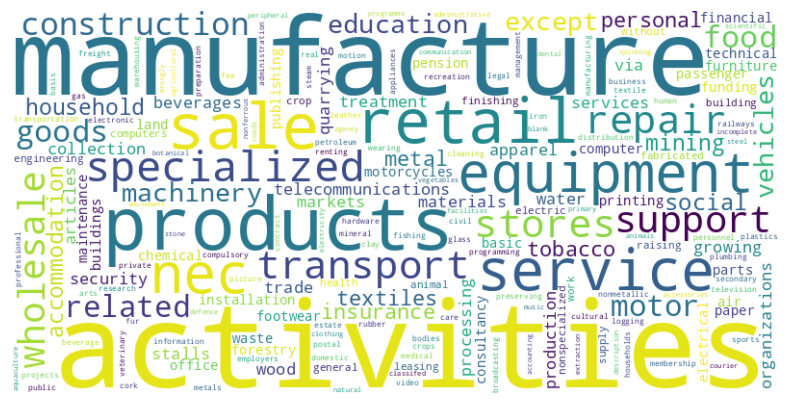

In [14]:
# Calculate word frequencies
all_tokens = [token for tokens_list in df_2['NICName'] for token in tokens_list]
freq_dist = FreqDist(all_tokens)

# Visualize word frequencies using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
# Create a sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Convert the list to a string
df_2['NICName_str'] = df_2['NICName'].apply(lambda x: ' '.join(map(str, x)))

# Apply sentiment analysis to the new string column
df_2['sentiment_score'] = df_2['NICName_str'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [17]:
# Assuming you have already trained and saved the Word2Vec model
# Load the Word2Vec model
loaded_model = Word2Vec.load("word2vec_model")

# Check if 'workers' is in the vocabulary
word_to_check = 'grapes'

word_vector = loaded_model.wv[word_to_check]

# # Get the vocabulary of the model
vocabulary = loaded_model.wv.key_to_index

# # Print the vocabulary
print("Vocabulary:", vocabulary)

Vocabulary: {'activities': 0, 'manufacture': 1, 'products': 2, 'sale': 3, 'retail': 4, 'service': 5, 'nec': 6, 'equipment': 7, 'specialized': 8, 'stores': 9, 'repair': 10, 'transport': 11, 'support': 12, 'wholesale': 13, 'construction': 14, 'goods': 15, 'food': 16, 'related': 17, 'motor': 18, 'machinery': 19, 'except': 20, 'vehicles': 21, 'education': 22, 'social': 23, 'household': 24, 'accommodation': 25, 'mining': 26, 'insurance': 27, 'tobacco': 28, 'metal': 29, 'textiles': 30, 'personal': 31, 'telecommunications': 32, 'apparel': 33, 'growing': 34, 'security': 35, 'beverages': 36, 'via': 37, 'organizations': 38, 'trade': 39, 'water': 40, 'services': 41, 'articles': 42, 'production': 43, 'collection': 44, 'processing': 45, 'wood': 46, 'markets': 47, 'stalls': 48, 'treatment': 49, 'quarrying': 50, 'materials': 51, 'motorcycles': 52, 'land': 53, 'furniture': 54, 'installation': 55, 'electrical': 56, 'buildings': 57, 'waste': 58, 'financial': 59, 'publishing': 60, 'air': 61, 'passenger':

In [18]:
# Get the vocabulary of the Word2Vec model
vocabulary = loaded_model.wv.key_to_index

# Print the first 10 words in the vocabulary
print(list(vocabulary.keys())[:10])

['activities', 'manufacture', 'products', 'sale', 'retail', 'service', 'nec', 'equipment', 'specialized', 'stores']


In [19]:
df_2.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude', 'NICName_str',
       'sentiment_score'],
      dtype='object')

In [23]:
df_2.to_csv("final_Industrial_HR_Dataset.csv", index = False)